In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from utils.err import *

In [2]:
import pandas as pd
import numpy as np
from dataGeneration.utils import *
from utils.vis import *
from tqdm import tqdm
import time

In [3]:
f_name = '../dataGeneration/csv/Au_interpolated.csv'
content = pd.read_csv(f_name)

In [4]:
e1 = np.sqrt(77/2.6)
e3 = 1.78

# e1, e3 = 1.5, 1.0
print(e1)

5.44200189409969


In [5]:
r = {
    'r1': np.array([2, 8, 15])*1e-9,
    'r2': np.array([4, 10, 17])*1e-9,
}
eps = {
    'e1': e1,
    'e2': content['er'].values+1j*content['ei'].values,
    'e3': e3,
}
lambd = 1e-9*content['wl'].values

In [6]:
# plotArea(
#     r, eps, lambd,
#     figs=['sca', 'abs', 'tot'],label_mode=['r2'],
# )

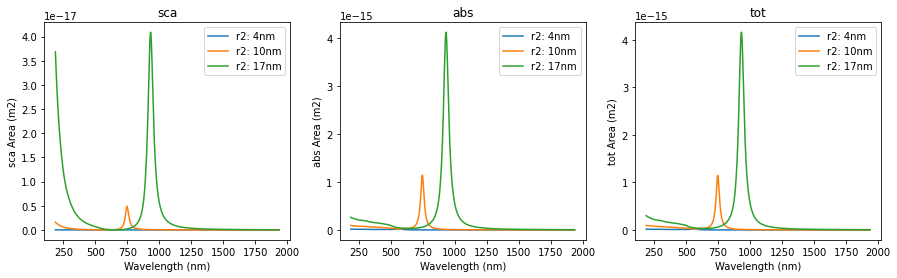

In [7]:
plotArea(
    r, eps, lambd,
    figs=['sca', 'abs', 'tot'], label_mode=['r2'],
    overlay=True, debug=True
)

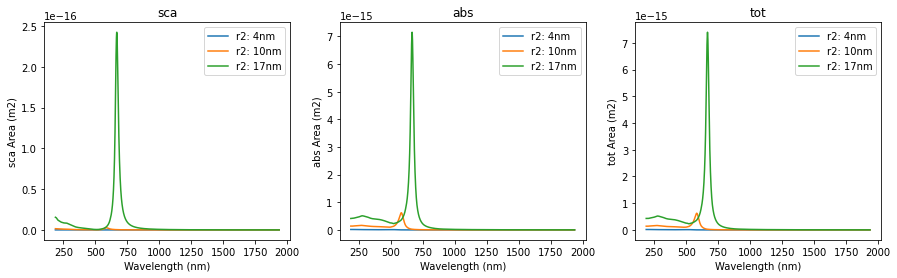

In [9]:
e1, e3 = 1.5, 1
r = {
    'r1': np.array([2, 8, 15])*1e-9,
    'r2': np.array([4, 10, 17])*1e-9,
}
eps = {
    'e1': e1,
    'e2': content['er'].values+1j*content['ei'].values,
    'e3': e3,
}
lambd = 1e-9*content['wl'].values

plotArea(
    r, eps, lambd,
    figs=['sca', 'abs', 'tot'], label_mode=['r2'],
    overlay=True, debug=True
)